<a href="https://colab.research.google.com/github/JulianGeis/forecasting_heatload/blob/master/SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# this script develops a sarima and sarimax model to forecast the heat load
# all parameters can be modified: default forecast horizon is equal to 72h (3d) and a subsample of 480h (20d) is used to specify the model 
# cause of runtime problems for larger datasets as default forecast ist executet for the year 2016 beginning from 2016-01-01 00:00:00 
# and is reimplemented for every new day evaluation is developed by calculating the mse, rmse and mape

!pip install pmdarima

# import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
import statsmodels.api as sm
import statsmodels as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf, adfuller
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
register_matplotlib_converters()

In [0]:
from google.colab import files
uploaded = files.upload()

Saving data_dummies to data_dummies (1)


iteration: 1
stationary after one differencing


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


iteration: 2
stationary after one differencing


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


iteration: 3
stationary after one differencing


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


iteration: 4
stationary after one differencing


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


iteration: 5
stationary after one differencing


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


iteration: 6
stationary after one differencing


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


iteration: 7
stationary after one differencing


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


iteration: 8
stationary after one differencing


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


iteration: 9
stationary after one differencing


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


iteration: 10
stationary after one differencing


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


iteration: 11
stationary after one differencing


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


iteration: 12
stationary after one differencing


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


iteration: 13
stationary after one differencing


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


iteration: 14
stationary after one differencing


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


iteration: 15
stationary after one differencing


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


iteration: 16
stationary after one differencing


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


iteration: 17
stationary after one differencing


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


iteration: 18
stationary after one differencing


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


iteration: 19
stationary after one differencing


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


iteration: 20
stationary after one differencing


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


MessageError: ignored

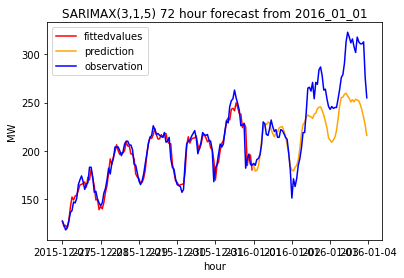

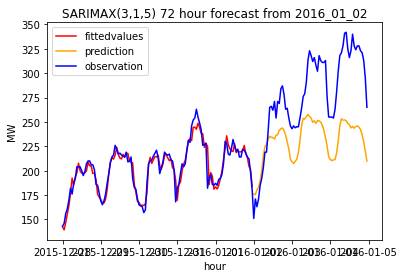

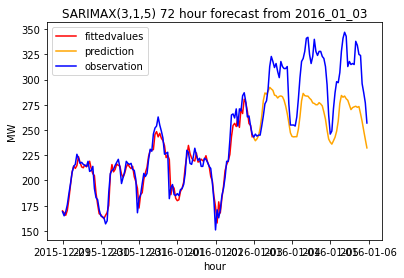

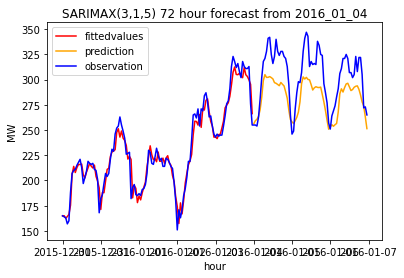

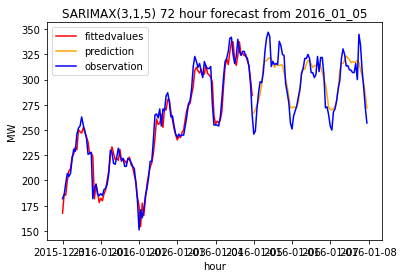

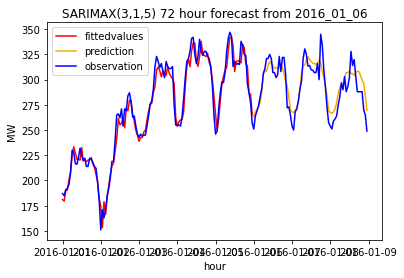

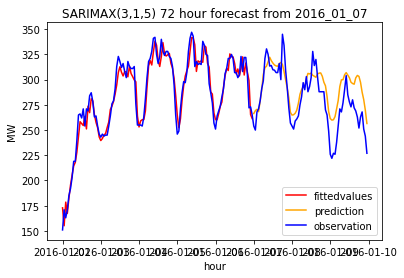

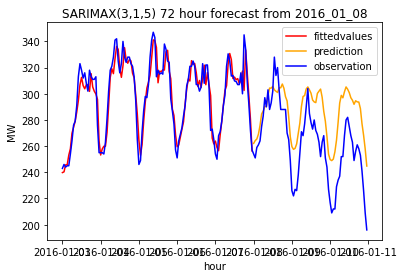

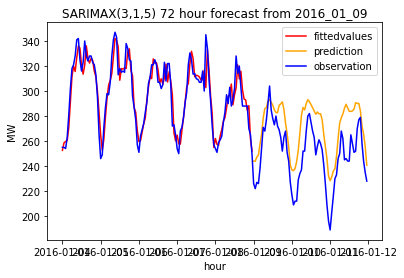

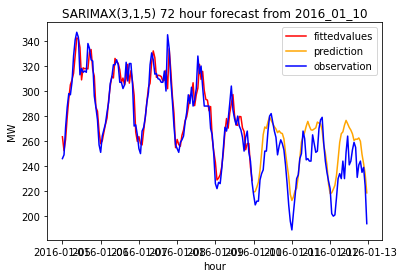

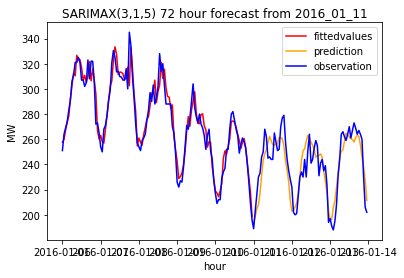

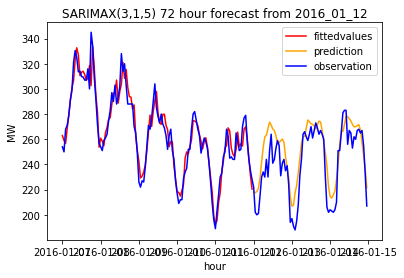

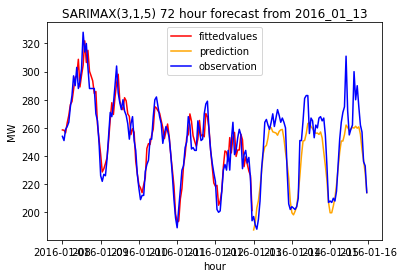

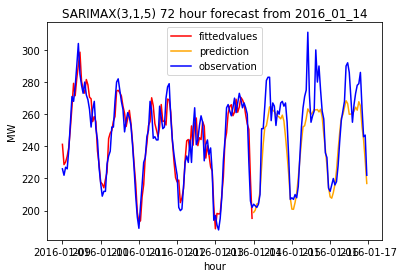

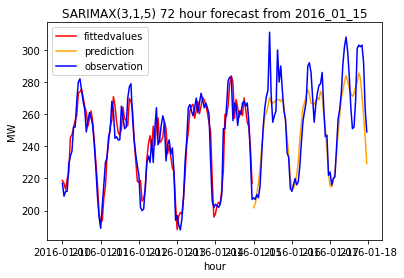

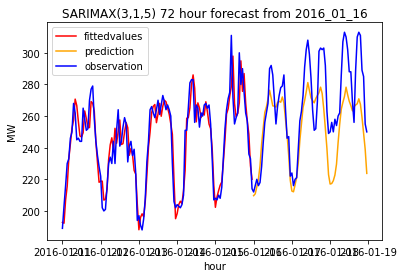

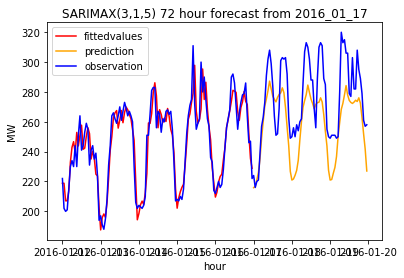

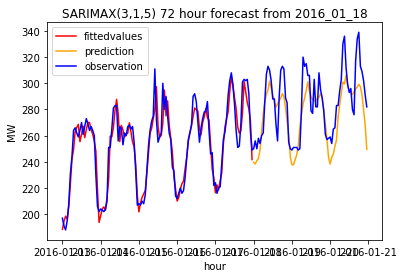

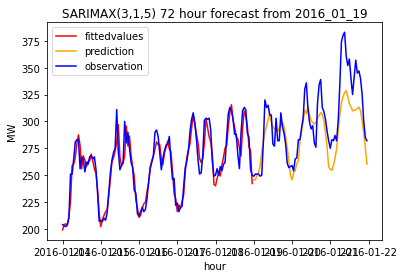

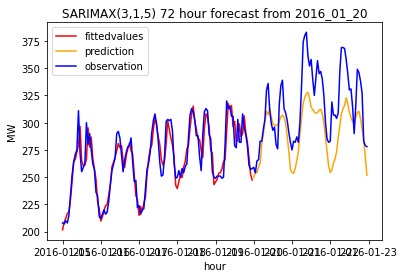

In [0]:

startTime = dt.datetime.now()            # observe script running time

## data preperation
# import data
data = pd.read_csv('data_dummies')
# set date as type datetime
nhours = 26304; start = dt.datetime(2014, 1, 1, 0, 0, 0); date = [start + dt.timedelta(hours = x) for x in range(0, nhours)]; data['date'] = date; data.set_index('date', inplace = True)
# include constant to model
data['const'] = 1; data['i'] = range(0,len(data))
# seperate into test and train
train = data['2014-01-01 00:00:00':'2015-12-31 23:00:00']
test = data['2015-12-31 23:00:00':'2016-12-31 23:00:00']

# # Obtaining 24 subsamples of equal length
# subsamples = np.array(np.split(train.load,24))  # (24, 730)
#
# # Checking for stationarity: one ts in summer (July 2016) is already stationary all others need one order of differencing
# # arma (p,q) model selection via lowest AIC: with max_lags =4 -> arma(4,4) | with max_lags =5 -> arma(3,5)
# for i in range(24):
#     result = adfuller(subsamples[i]) # H0: unit root; H1: stationary
#     if( result[1] < 0.05):    # If you can recejt H0 with at least 5% confidence the time series is statinary
#         print('ts' + str(i+1) + ' is already stationary')
#         resDiff = sm.tsa.stattools.arma_order_select_ic(subsamples[i], max_ar=5, max_ma=5, ic='aic', trend='c')
#         print('ARMA(p,q) =', resDiff['aic_min_order'], 'is the best.')
#     else:
#         result = adfuller(np.diff(subsamples[i]))
#         if (result[1] < 0.05):  # If you can recejt H0 with at least 5% confidence the time series is stationary
#             print('ts' + str(i+1) + ' is stationary after one differencing')
#             resDiff = sm.tsa.stattools.arma_order_select_ic(np.diff(subsamples[i]), max_ar=5, max_ma=5, ic='aic', trend='c')
#             print('ARMA(p,q) =', resDiff['aic_min_order'], 'is the best.')
#         else:
#             print('ts' + str(i+1) + ' is not stationary after one differencing')


# preparing variables
start_d = dt.datetime(2016, 1, 1, 0, 0, 0)              # starting date of forecast
start_i = data.i[data.index == start_d].astype(int)[0]  # starting date as int index
h = 24*3		# prediction horizon in hours
n = 20			# number of predictions (max 8712h?) 363d?
m = 24*20       # number of hours in the subsample to train model (max = 17496)
interval = 24   # time between the forecasts in hours

# SARIMAX specification
p, d, q = 3, 1, 5
sp, sd, sq, s = 0,0,0,0   # 1, 1, 1, 24 | s is number of periods in season(here = 24 for daily pattern)

# preparing variables
sarimax_prediction = pd.DataFrame(index=pd.date_range(start_d, periods= (n-1)*interval+h, freq='h') )
yhat,y = np.full((n, h), -999), np.full((n, h), -999)

# exog=data.drop(['load', 'month', 'weekday', 'hour','i'], axis = 1)
cols = [('hour-%d' % (j+1) ) for j in range(24)] + ['temp','const']

# sarimax = SARIMAX(endog=train.load,exog=train[['temp']], order=(p, d, q), #seasonal_order=(sp, sd, sq, s),
#                   freq='H', enforce_stationarity=False, enforce_invertibility=False).fit(maxiter=100)

for i in range(n):
    print('iteration: ' + str(i+1))
    result = adfuller(data.load[start_i - m + i * interval:start_i + i * interval])
    if( result[1] < 0.05):
        print('already stationary')
        d=0
    else:
        result = adfuller(np.diff(data.load[start_i - m + i * interval:start_i + i * interval]))
        if (result[1] < 0.05):
            print('stationary after one differencing')
            d=1
        else:
            print('not stationary after one differencing')
            d=2

    sarimax = SARIMAX(endog=data.load[start_i - m + i * interval:start_i + i * interval],
                      exog=data[cols][start_i - m + i * interval:start_i + i * interval],
                      order=(p, d, q), freq='H', enforce_stationarity=False,    # seasonal_order=(sp, sd, sq, s),
                      enforce_invertibility=False).fit(maxiter=10)

    # prediction
    sarimax_pred = sarimax.predict(start = m, end = m+(h-1), typ='levels', exog=data[cols][start_i+i*interval:start_i+h+i*interval])
    sarimax_prediction['test'+str(i)] = sarimax_pred
    sarimax_prediction.rename(columns={'test'+str(i): (start_d + dt.timedelta(int(i*(interval/24)))).strftime('%Y_%m_%d')}, inplace=True)

    # y and yhat
    yhat[i] = sarimax_pred.values
    y[i] = data.load[start_i+i*interval:start_i+h+i*interval].values

    # plot of prediction and last 5 days with fitted values
    plt.figure(i*10)
    plt.plot(sarimax.fittedvalues[len(sarimax.fittedvalues) - 24 * 5:], label = 'fittedvalues', color = 'red')
    plt.plot(sarimax_pred, label = 'prediction', color = 'orange')
    plt.plot(data.load[(start_i+i*interval)- 24*5:start_i+h+i*interval], label = 'observation', color ='b')
    plt.title('SARIMAX(' + str(p) + ',' + str(d) + ',' + str(q) + ') ' + str(h) + ' hour forecast from ' + (start_d + dt.timedelta(int(i*(interval/24)))).strftime('%Y_%m_%d'))
    plt.xlabel('hour');plt.ylabel('MW');plt.legend()

# save properties
pd.DataFrame(yhat).to_csv('yhat_sarimax('+str(p)+','+str(d)+','+str(q)+')('+str(sp)+','+str(sd)+','+str(sq)+')h='+str(h)+ 'm=' +str(m)+ 'i=' +str(interval), index = False)           
from google.colab import files
files.download('yhat_sarimax('+str(p)+','+str(d)+','+str(q)+')('+str(sp)+','+str(sd)+','+str(sq)+')h='+str(h)+ 'm=' +str(m)+ 'i=' +str(interval))

pd.DataFrame(y).to_csv('y_sarimax('+str(p)+','+str(d)+','+str(q)+')('+str(sp)+','+str(sd)+','+str(sq)+')h='+str(h)+ 'm=' +str(m)+ 'i=' +str(interval), index = False)           
from google.colab import files
files.download('y_sarimax('+str(p)+','+str(d)+','+str(q)+')('+str(sp)+','+str(sd)+','+str(sq)+')h='+str(h)+ 'm=' +str(m)+ 'i=' +str(interval))

sarimax_prediction.to_csv('prediction_sarimax('+str(p)+','+str(d)+','+str(q)+')('+str(sp)+','+str(sd)+','+str(sq)+')h='+str(h)+ 'm=' +str(m)+ 'i=' +str(interval), index = True)          
files.download('prediction_sarimax('+str(p)+','+str(d)+','+str(q)+')('+str(sp)+','+str(sd)+','+str(sq)+')h='+str(h)+ 'm=' +str(m)+ 'i=' +str(interval))

print('elapsed time: ', dt.datetime.now() - startTime)         # observe script running time

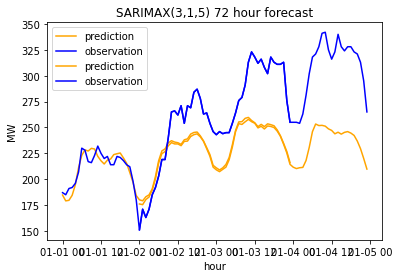

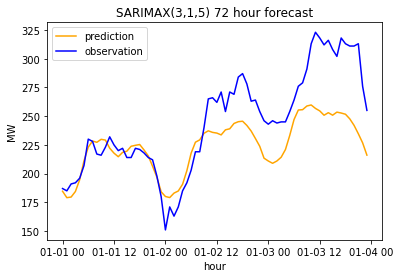

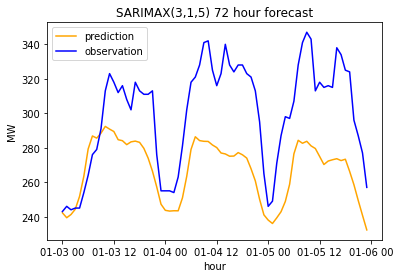

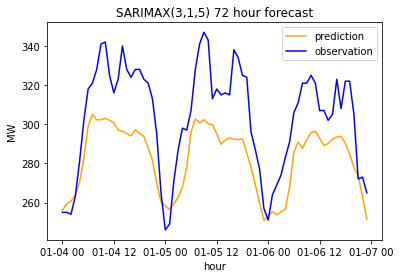

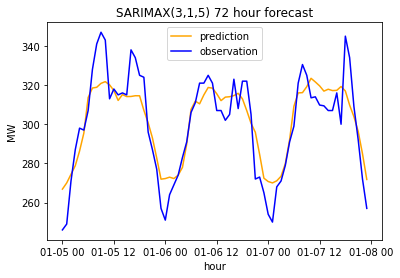

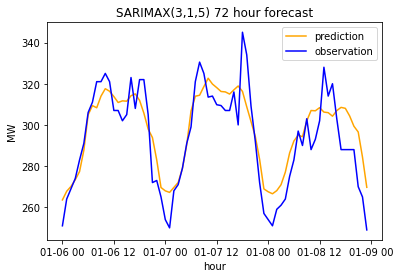

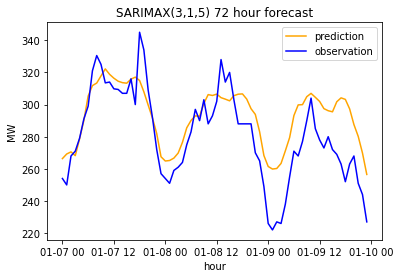

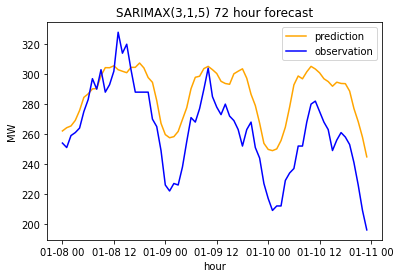

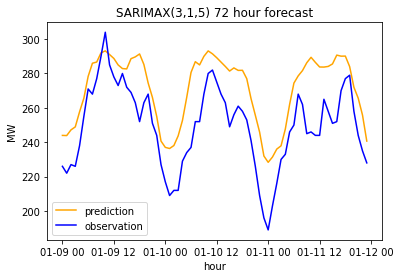

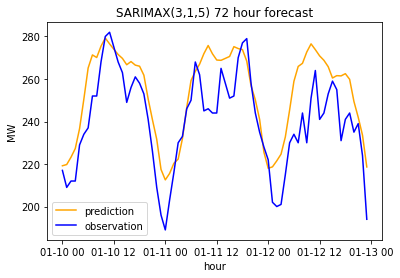

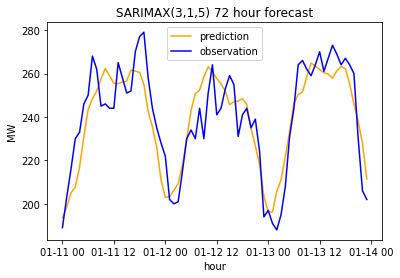

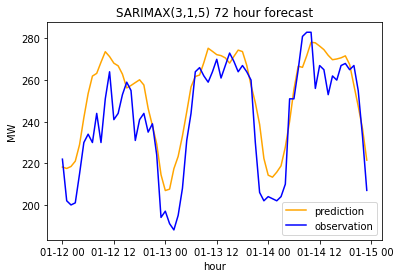

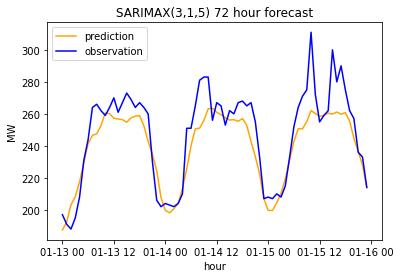

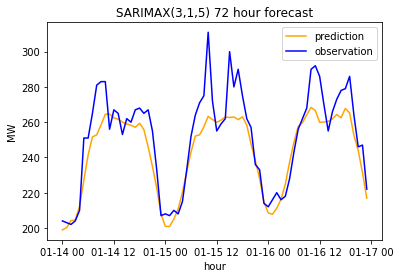

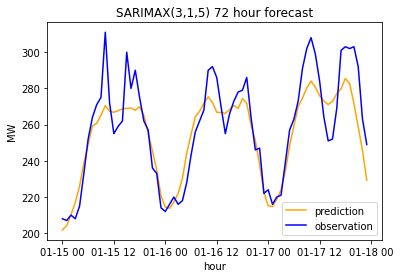

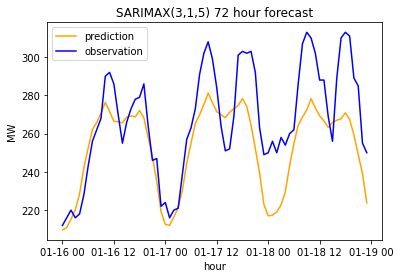

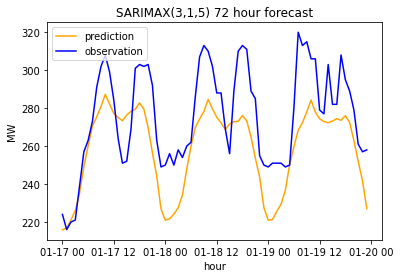

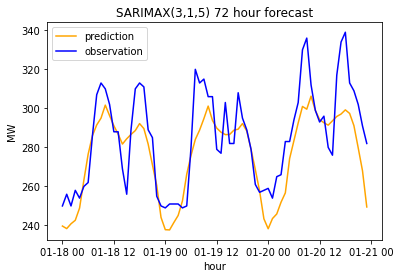

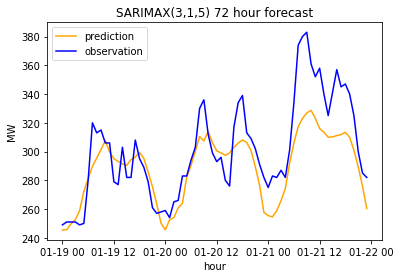

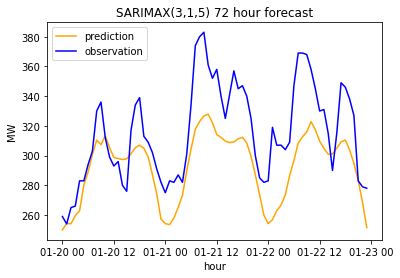

In [0]:
# plots

# observation and prediction
start, end = '2016-01-01 00:00:00','2016-01-03 23:00:00'    # 72h between
plt.plot(pd.DataFrame(sarimax_prediction[start:end]).dropna(axis=1), color = 'orange', label='prediction')
plt.plot(data.load[start:end],label='observation', color ='b')
plt.title('SARIMAX('+str(p)+','+str(d)+','+str(q)+') '+str(h)+' hour forecast')
plt.xlabel('hour')
plt.ylabel('MW')
plt.legend()

for i in range(n,):
    plt.figure(i)
    plt.plot(pd.DataFrame(sarimax_prediction.iloc[:,i]).dropna(axis=0), color='orange', label='prediction')
    plt.plot(data.load[pd.DataFrame(sarimax_prediction.iloc[:,i]).dropna(axis=0).index], label='observation', color='b')
    plt.title('SARIMAX(' + str(p) + ',' + str(d) + ',' + str(q) + ') ' + str(h) + ' hour forecast')
    plt.xlabel('hour')
    plt.ylabel('MW')
    plt.legend()

# #safe prediction
# pd.DataFrame(y).to_csv('Output/sarimax/'+'y_sarimax('+str(p)+','+str(d)+','+str(q)+')('+str(sp)+','+str(sd)+','+str(sq)+')h='+str(h)+ 'm=' +str(m)+ 'i=' +str(interval))
# pd.DataFrame(yhat).to_csv('Output/sarimax/'+'yhat_sarimax('+str(p)+','+str(d)+','+str(q)+')('+str(sp)+','+str(sd)+','+str(sq)+')h='+str(h)+ 'm=' +str(m)+ 'i=' +str(interval))
# sarimax_prediction.to_csv('Output/sarimax/'+'prediction_sarimax('+str(p)+','+str(d)+','+str(q)+')('+str(sp)+','+str(sd)+','+str(sq)+')h='+str(h)+ 'm=' +str(m)+ 'i=' +str(interval), index = True)

# # load prediction
# y_load = np.array(pd.read_csv('Output/sarimax/'+'y_sarimax(4,1,4)(4,1,4)h=72m=480', header=0, index_col=0))
# yhat_load = np.array(pd.read_csv('Output/sarimax/'+'yhat_sarimax(4,1,4)(4,1,4)h=72m=480', header=0, index_col=0))
# sarimax_prediction_load= pd.read_csv('Output/sarimax/'+'prediction_sarimax(4,1,4)(4,1,4)h=72m=480', header=0, index_col=0, date_parser=pd.to_datetime)

In [0]:
pd.DataFrame(yhat).to_csv('yhat_sarimax('+str(p)+','+str(d)+','+str(q)+')('+str(sp)+','+str(sd)+','+str(sq)+')h='+str(h)+ 'm=' +str(m)+ 'i=' +str(interval), index = False)           
from google.colab import files
files.download('yhat_sarimax('+str(p)+','+str(d)+','+str(q)+')('+str(sp)+','+str(sd)+','+str(sq)+')h='+str(h)+ 'm=' +str(m)+ 'i=' +str(interval))

pd.DataFrame(y).to_csv('y_sarimax('+str(p)+','+str(d)+','+str(q)+')('+str(sp)+','+str(sd)+','+str(sq)+')h='+str(h)+ 'm=' +str(m)+ 'i=' +str(interval), index = False)           
from google.colab import files
files.download('y_sarimax('+str(p)+','+str(d)+','+str(q)+')('+str(sp)+','+str(sd)+','+str(sq)+')h='+str(h)+ 'm=' +str(m)+ 'i=' +str(interval))

sarimax_prediction.to_csv('prediction_sarimax('+str(p)+','+str(d)+','+str(q)+')('+str(sp)+','+str(sd)+','+str(sq)+')h='+str(h)+ 'm=' +str(m)+ 'i=' +str(interval), index = True)          
files.download('prediction_sarimax('+str(p)+','+str(d)+','+str(q)+')('+str(sp)+','+str(sd)+','+str(sq)+')h='+str(h)+ 'm=' +str(m)+ 'i=' +str(interval))
